# PCA

In [81]:
import pandas as pd

In [82]:
import matplotlib.pyplot as plt

In [83]:
import numpy as np

In [84]:
df=pd.read_csv("mnist_train.csv")

In [85]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
l=df["label"]

In [87]:
d=df.drop("label",axis=1)

In [88]:
d.shape

(60000, 784)

In [89]:
l.shape

(60000,)

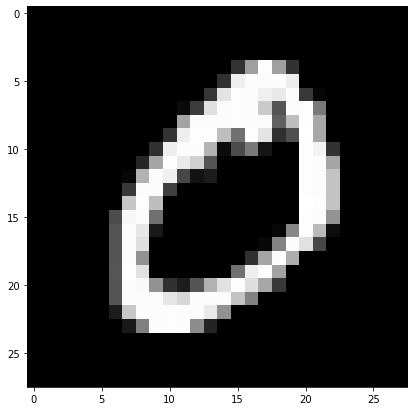

In [92]:
plt.figure(figsize=(7,7))
idx=1
grid_data=d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,cmap="gray")
plt.show()

# 2-D Visualization using PCA

In [93]:
labels=l.head(15000)
data=d.head(15000)
print(data.shape)

(15000, 784)


In [94]:
from sklearn.preprocessing import StandardScaler

In [100]:
std_data=StandardScaler().fit_transform(data)

In [101]:
print(std_data.shape)

(15000, 784)


In [104]:
sample_data=std_data

In [105]:
covar_matrix=np.matmul(sample_data.T,sample_data)

In [106]:
covar_matrix.shape

(784, 784)

In [110]:
from scipy.linalg import eigh

In [112]:
values,vectors=eigh(covar_matrix,eigvals=(782,783))

In [113]:
vectors.shape

(784, 2)

In [114]:
values.shape

(2,)

In [115]:
vectors=vectors.T

In [116]:
vectors.shape

(2, 784)

In [117]:
new_coordinates=np.matmul(vectors,sample_data.T)

In [118]:
sample_data.T.shape

(784, 15000)

In [119]:
vectors.shape

(2, 784)

In [120]:
new_coordinates.shape

(2, 15000)

In [121]:
import pandas as pd

In [122]:
new_coordinates=np.vstack((new_coordinates,labels)).T

In [123]:
dataframe=pd.DataFrame(data=new_coordinates,columns=["1st_Principle","2nd_Principle","labels"])

In [124]:
dataframe.head()

,1st_Principle,2nd_Principle,labels
0,-4.457050,0.960769,5.0
1,-7.397795,-8.658155,0.0
2,9.640690,-2.082854,4.0
3,-3.356074,7.187465,1.0
4,2.979880,4.933889,9.0


In [129]:
dataframe.shape

(15000, 3)

In [125]:
df=pd.DataFrame()

In [126]:
df['1st']=[-5.558661,-5.043558,6.193625,19.305278]
df['2nd']=[-1.558661,-2.043558,2.193635,9.305278]
df['label']=[1,2,3,4]

In [127]:
import seaborn as sns

C:\Users\Sanjeev Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


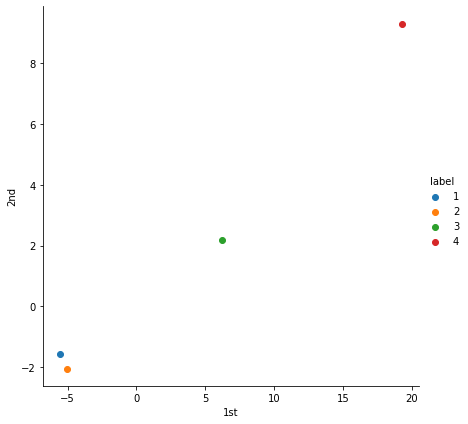

In [128]:
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,"1st","2nd").add_legend()

C:\Users\Sanjeev Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


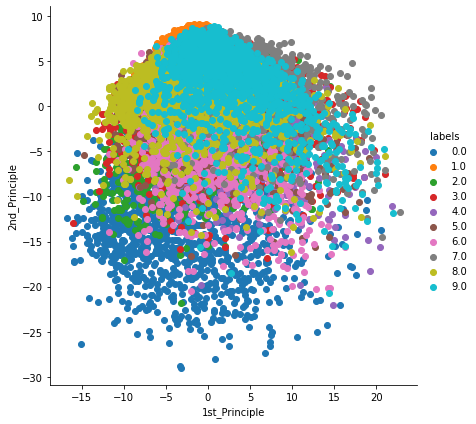

In [133]:
sns.FacetGrid(dataframe,hue="labels",size=6).map(plt.scatter,"1st_Principle","2nd_Principle").add_legend()

# PCA using scikit-learn

In [134]:
from sklearn import decomposition

In [135]:
pca=decomposition.PCA()

In [136]:
pca.n_componenets=2
pca_data=pca.fit_transform(sample_data)

In [138]:
pca_data.shape

(15000, 784)

C:\Users\Sanjeev Kumar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


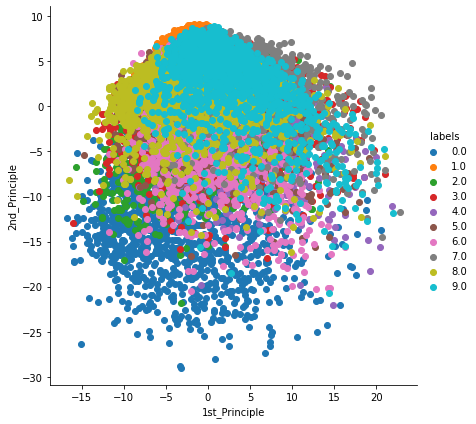

In [144]:
sns.FacetGrid(dataframe,hue="labels",size=6).map(plt.scatter,"1st_Principle","2nd_Principle").add_legend()
plt.show()